# Beginner Novice Eventing Completed Scores | Exploratory Data Analysis

This notebook will analyze the scores of beginner novice 3 day eventing competitors.  It focuses on the scores of those who completed the competition.  For the sake of simplicity, the scores of the competitors that did not complete the event are not counted in this spreadsheet.  There are several reasons a competitor could not complete, including a rider fall (RF), technical elimination (TE), or withdrawl (W) from the competition.  As each of these non-finishes are indicated by a letter, it is impossible to perform the same type of analysis on non-finishers, as the values for certain fields are not quantitative, but qualitative.  The scores of competitors who did not finish have been analyzed in their own notebook [here](SchoegglJacquieMSDS692ExploratoryIncompleted.ipynb).  The [machine learning notebook](SchoegglJacquieMSDS692MachineLearning.ipynb) also contains a comparison of dressage scores for competitors who completed and those that didn't.

The first step is to read in the file where the scores are held.  We do this using the "read.csv" command.  This creates a data frame containing all of the scores from the file.  header=TRUE indicates that there is a header in the file that contains the titles of the different columns.

We will also load in the Hmisc and ggplot2 libraries to use various functions available.

Finally, we will assign some variables that will be used througout the notebook.

In [145]:
#load libraries
library(Hmisc)
library(ggplot2)
library(dplyr)
#read file
scores <- read.csv(file="scores.csv", header=TRUE)
#declare variables
divisionLabels <- c("Amateur", "Horse", "Junior", "Master", "Rider", "Youth")
numberOfCompetitorsLabel <- "Number of Competitors"

Next, we will show the first 6 elements of the table.  This gives us a basic idea of the data.  We can see that there are 12 columns for each row.  These are:

* dressage score
* place after dressage
* cross country jumping penalties
* cross country time penalties
* total penalties after cross country
* place after cross country
* show jumping jumping penalties
* show jumping time penalties
* total penalties after show jumping (final penalty score)
* final place
* year
* Division (A = Amateur, H = Horse, R = Rider, M = Master(over age ), J = Junior(under age 18), Y = Young Rider(under age 14)



In [2]:
head(scores)

Dr.Score,Place.after.Dr,XC.Jump,XC.Time,Total.after.XC,Place.after.XC,SJ.Jump,SJ.Time,Total.after.SJ,Final.Place,Year,Division
24.5,1,0,0.0,24.5,1,0,0,24.5,1,2018,A
28.1,4,0,0.4,28.5,2,0,0,28.5,2,2018,A
30.5,6,0,0.0,30.5,4,0,0,30.5,3,2018,A
31.1,8,0,0.0,31.1,6,0,0,31.1,4,2018,A
32.0,11,0,0.0,32.0,8,0,0,32.0,5,2018,A
32.5,13,0,0.0,32.5,10,0,0,32.5,6,2018,A


## Initial Data Exploration

Now, let's begin our initial analysis of the dataset.  First, let's take a look at the distribution of initial dressage scores.

In [3]:
summary(scores$Dr.Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.80   30.57   33.50   33.65   37.00   46.30 

We can see that the lowest dressage score was a 19.8 and the highest was a 46.3.  We can see that the median (33.5) and the mean (33.72) are fairly close together, implying that there are not many outliers in dressage score.

This is confirmed by a histogram that displays a fairly normal looking distribution.

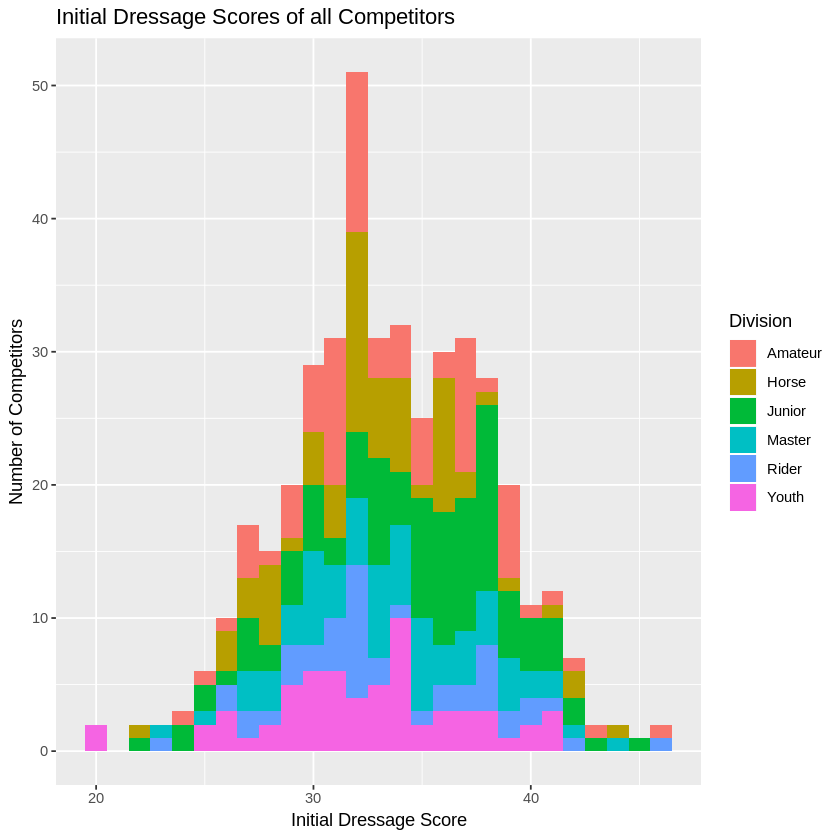

In [27]:
ggplot(scores, aes(x=scores$Dr.Score, fill=Division))+geom_histogram(binwidth=1) + 
    scale_x_continuous("Initial Dressage Score") + 
    scale_y_continuous(numberOfCompetitorsLabel) + 
    ggtitle("Initial Dressage Scores of all Competitors") + 
    scale_fill_discrete(label=divisionLabels)

Now, look at the summary of final scores.  We can see that the lowest score is still a 19.8, meaning that the competitor did not obtain any cross country or show jumping penalties.  However, the other numbers are quite different.  We can see that the median and mean have a much larger difference than the dressage scores, which makes sense given the number of penalities that can be obtained in cross country and show jumping.

In [5]:
summary(scores$Total.after.SJ)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.80   32.50   37.80   42.61   45.88  176.50 

The histogram below confirms what the above summary tells us.  This histogram has a right skew.  As the competition goes on, the scores increase, but cannot ever decrease, resulting in a larger portion of high scores that causes a skew.

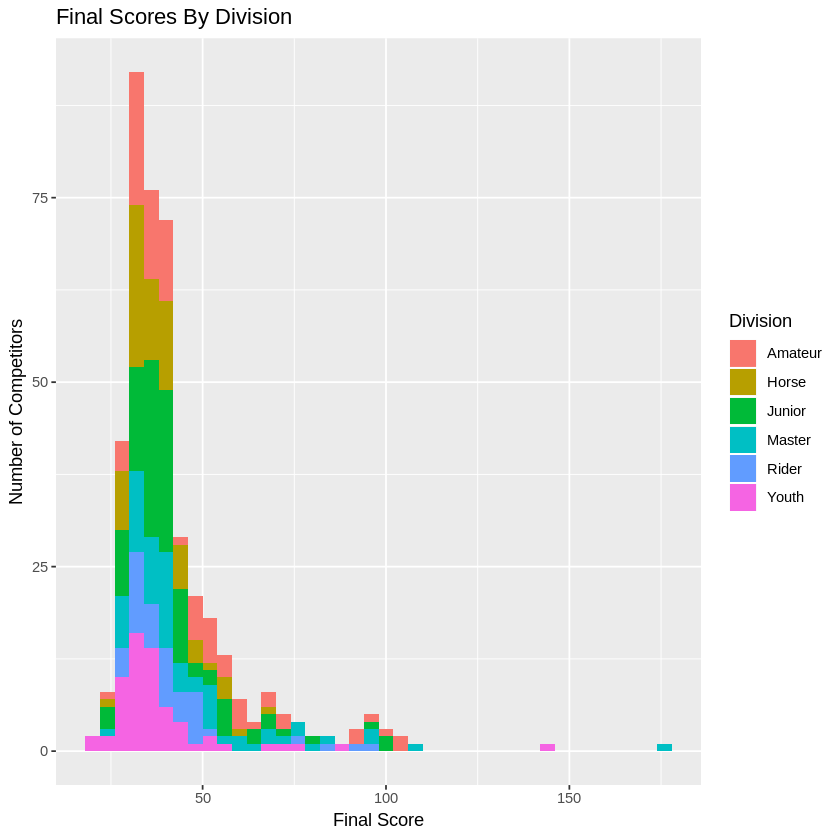

In [26]:
ggplot(scores, aes(x=scores$Total.after.SJ, fill=Division))+
    geom_histogram(data=scores, binwidth=4) + 
    scale_x_continuous("Final Score") + 
    scale_y_continuous(numberOfCompetitorsLabel) + 
    ggtitle("Final Scores By Division") + 
    scale_fill_discrete(label=divisionLabels)

## Finishing Strong: Comparing Initial Dressage Score with Final Score

One of the most common goals in 3 day eventing is to finish on your dressage score.  This means that you do not accumulate any penalties from the cross country or show jumping phases.

But how many competitors actually achieve this goal?  Let's take a look.

First things first, we need to add a variable the determines whether or not a competitor finished on their dressage score.  If the difference between the initial dressage score and the final score is 0, that means they did not gain any more penalties.  Let's go ahead and add a new column to our data table.

In [66]:
scores["FinishedOnDrScore"] <- scores$Total.after.SJ - scores$Dr.Score == 0
head(scores)

Dr.Score,Place.after.Dr,XC.Jump,XC.Time,Total.after.XC,Place.after.XC,SJ.Jump,SJ.Time,Total.after.SJ,Final.Place,Year,Division,FinishedOnDrScore
24.5,1,0,0.0,24.5,1,0,0,24.5,1,2018,A,TRUE
28.1,4,0,0.4,28.5,2,0,0,28.5,2,2018,A,FALSE
30.5,6,0,0.0,30.5,4,0,0,30.5,3,2018,A,TRUE
31.1,8,0,0.0,31.1,6,0,0,31.1,4,2018,A,TRUE
32.0,11,0,0.0,32.0,8,0,0,32.0,5,2018,A,TRUE
32.5,13,0,0.0,32.5,10,0,0,32.5,6,2018,A,TRUE


Now we can see that there is a variable that tells us whether or not a competitor finished on their dressage score.  Let's compare the percentage of competitors who finished on their dressage score with those that didn't.

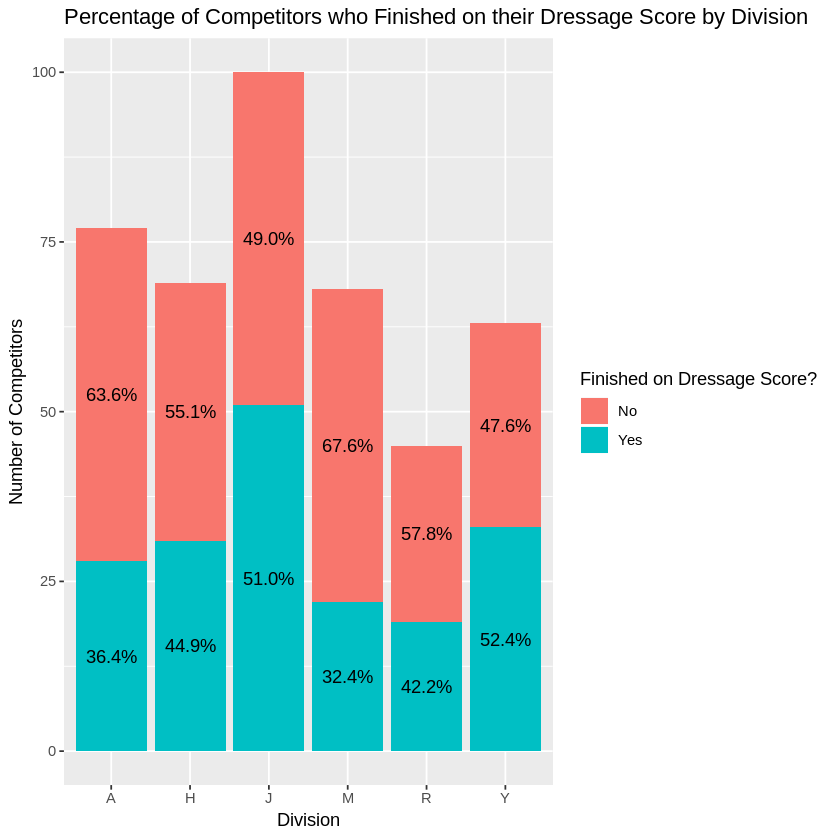

In [67]:
ggplot(scores %>% count(Division, FinishedOnDrScore) %>% group_by(Division) %>%
         mutate(percent=n/sum(n)),
         aes(Division, n, fill=FinishedOnDrScore)) +
       geom_bar(stat="identity") +
       geom_text(aes(label=paste0(sprintf("%1.1f", percent*100),"%")), 
            position=position_stack(vjust=0.5)) +
        scale_x_discrete("Division") + 
        scale_y_continuous(numberOfCompetitorsLabel) + 
        ggtitle("Percentage of Competitors who Finished on their Dressage Score by Division") + 
        scale_fill_discrete(name="Finished on Dressage Score?",
                           label=c("No", "Yes"))


Here, we can see that the Youth and Junior divisions are the only ones where over 50% finish on their dressage score.  The lowest percentage is the Master rider division, where only 32.4% of competitors finish on their dressage score.

Of those that do not finish on their dressage score, what is the average difference in score?

The summary below shows that the minimun and first quartile values are both 0.  The median difference in scores is 4, or one rail in show jumping.  From there the mean and third quartile jump up to values near 8, and the maximum is an astounding 137.

In [138]:
diffInScore <- scores$Total.after.SJ - scores$Dr.Score
summary(diffInScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   4.000   8.956   8.400 137.000 

Let's take a look at this graphically.

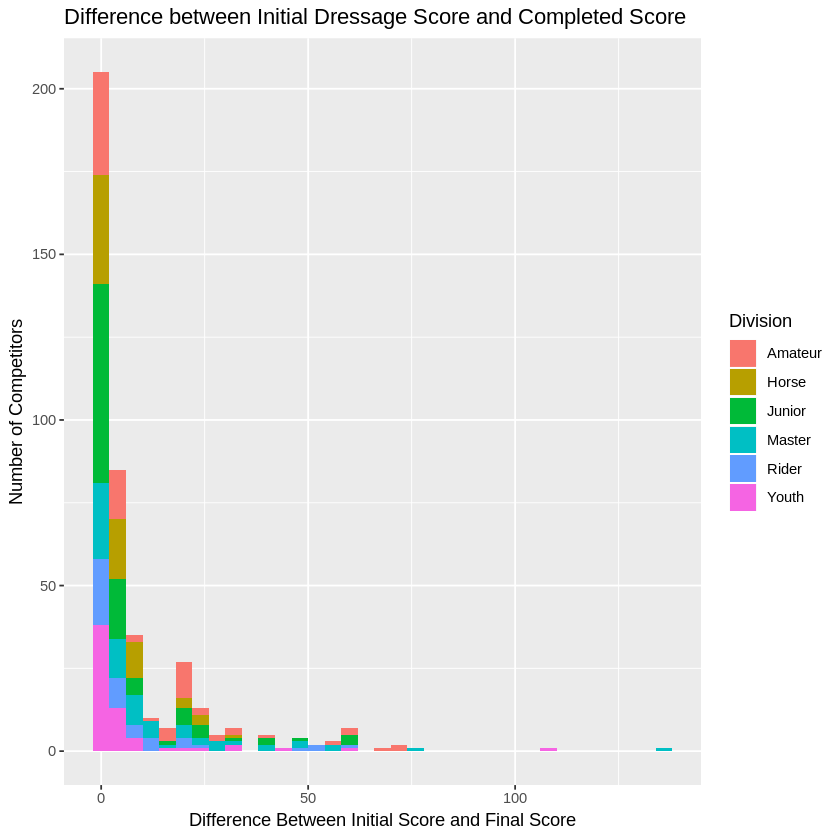

In [139]:
ggplot(scores, aes(x=scores$Total.after.SJ - scores$Dr.Score, fill=Division))+
    geom_histogram(data=scores, binwidth=4)+
    scale_x_continuous("Difference Between Initial Score and Final Score") +
    scale_y_continuous(numberOfCompetitorsLabel) +
    ggtitle("Difference between Initial Dressage Score and Completed Score") + 
    scale_fill_discrete(label=divisionLabels)

This histogram tells us that there is a wide margin between the difference in scores.  While the most common difference is 0, there is a spike a 4 penalties, which makes sense given the fact that pulling a rail in show jumping is 4 penalties.  There is another spike at 8, which would be 2 rails, and another at 20, which is the penalty for a refusal on cross country.  Finally, there are several outliers that show a difference of more than 60, meaning that the competitor most likely had multiple refusals on cross country.

Lastly, let's see what percentage of riders for each place finished on their dressage score.

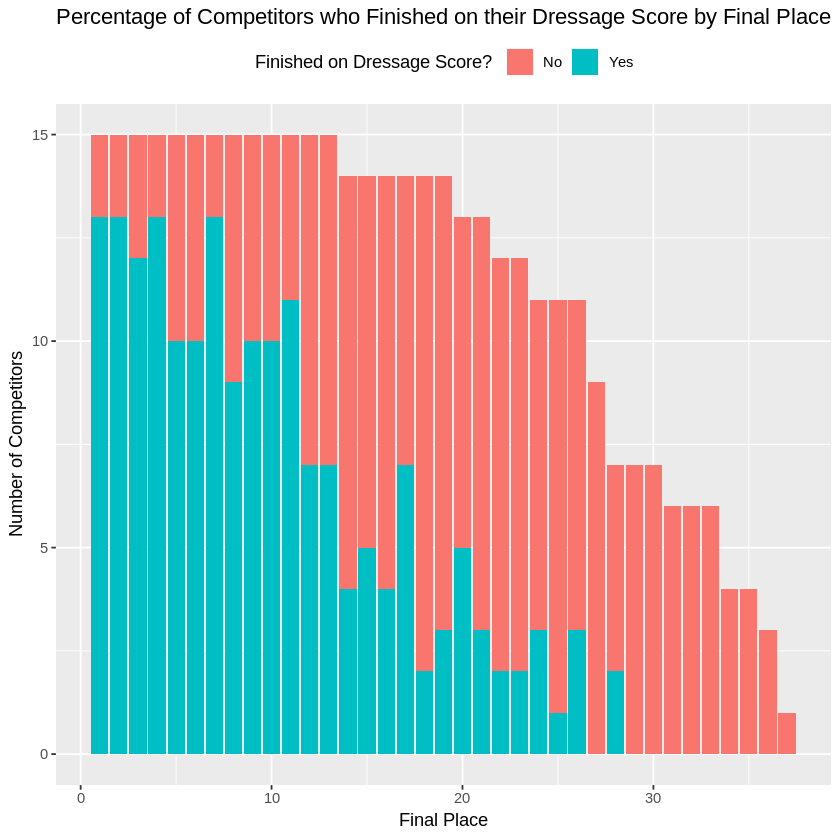

In [131]:
ggplot(scores %>% count(Final.Place, FinishedOnDrScore) %>% group_by(Final.Place) %>%
         mutate(percent=n/sum(n)),
         aes(Final.Place, n, fill=FinishedOnDrScore)) +
       geom_bar(stat="identity") +
        scale_x_continuous("Final Place") + 
        scale_y_continuous(numberOfCompetitorsLabel) + 
        ggtitle("Percentage of Competitors who Finished on their Dressage Score by Final Place") + 
        scale_fill_discrete(name="Finished on Dressage Score?",
                           label=c("No", "Yes")) + 
        theme(legend.position = "top")

It makes sense that there seems to be a downward trend in percentage of riders finishing on their dressage score as final place goes up.  The best competitors are those that finish on their dressage score, and the data above reflect that.

## Analysis of Added Penalties

Next, we will look at the distribution of cross country and show jumping penalties for competitors.

### Cross Country

Below we can see a good description of the cross country scores.  A large majority of competitors (352) have 0 penalties, meaning they did not have any refusals or falls.  This accounts for 83.4% of competitors.  12% of competitors have one refusal, while the rest had more than one refusal.


In [136]:
describe(scores$XC.Jump)

scores$XC.Jump 
       n  missing distinct     Info     Mean      Gmd 
     422        0        5    0.418    4.751    8.325 
                                        
Value          0    20    40    60   125
Frequency    352    51    11     7     1
Proportion 0.834 0.121 0.026 0.017 0.002

This information is conveyed in the histogram, which shows a similar trend.  Most competitors finish with less than 10 cross country penalty points.

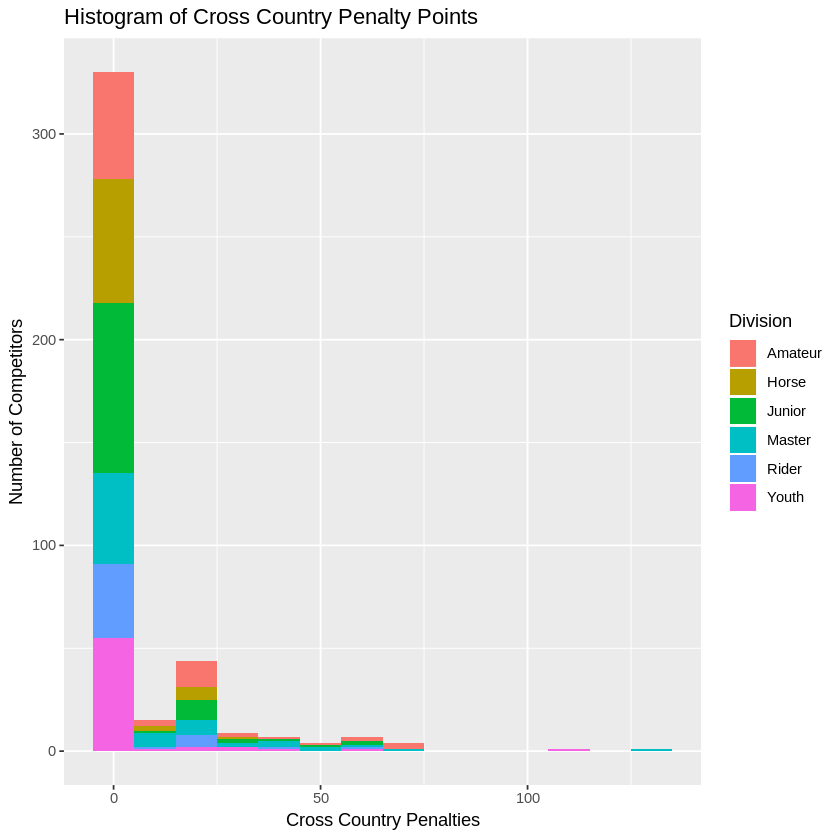

In [137]:
ggplot(scores, aes(x=scores$XC.Jump + scores$XC.Time, fill=Division))+
    geom_histogram(binwidth=10) +
    ggtitle("Histogram of Cross Country Penalty Points") + 
    scale_x_continuous(name = "Cross Country Penalties") + 
    scale_y_continuous(name = numberOfCompetitorsLabel) + 
    scale_fill_discrete(label=divisionLabels)

### Show Jumping

Next, we perform the same analysis on show jumping penalties.  We can see that 256 competitors did not collect any penalties in show jumping.  This means that 60% of competitors do not, while 23% collect 4 penalties.

In [40]:
totalSJPenalties <- scores$SJ.Jump + scores$SJ.Time
describe(totalSJPenalties)

totalSJPenalties 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     422        0       20    0.764     2.45    3.598        0        0 
     .25      .50      .75      .90      .95 
       0        0        4        8        9 
                                                                            
Value          0     1     2     3     4     5     6     7     8     9    10
Frequency    256     5     3     2    98     5     1     1    27     3     2
Proportion 0.607 0.012 0.007 0.005 0.232 0.012 0.002 0.002 0.064 0.007 0.005
                                                                
Value         12    13    14    16    19    20    28    31    32
Frequency      5     2     2     5     1     1     1     1     1
Proportion 0.012 0.005 0.005 0.012 0.002 0.002 0.002 0.002 0.002

The histogram below shows the same result: that most competitors finish with less than 4 penalties, and even more finish with less than 10.

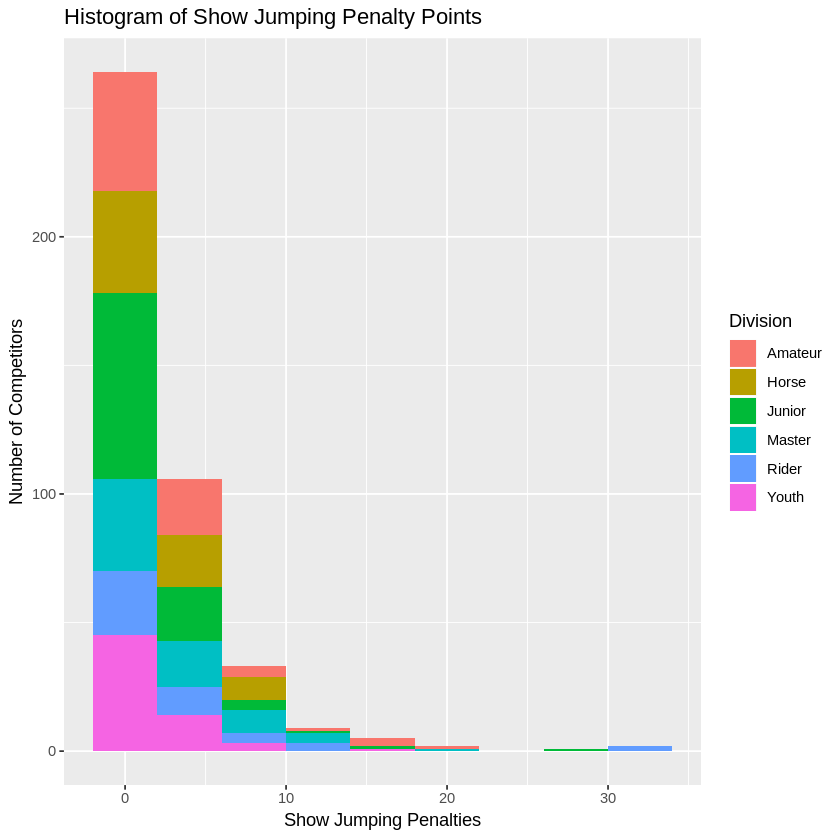

In [41]:
ggplot(scores, aes(x=totalSJPenalties, fill=Division))+
    geom_histogram(binwidth=4) + 
    scale_x_continuous("Show Jumping Penalties") + 
    scale_y_continuous(numberOfCompetitorsLabel) + 
    ggtitle("Histogram of Show Jumping Penalty Points") +
    scale_fill_discrete(label=divisionLabels)

## Movin' On Up: Changes in Placing

Let's examine the scores of competitors whose place changed from their initial placing in dressage.  First, we create the variable that determines a competitor's change in placing.  A positive change in place indicates that the dressage place is larger than the final place, meaning that the competitor moved up in placing.  A negative change in place indicates that the dressage place is less than the final place, meaning that the competitor moved down in placing.  A value of 0 means that the competitor remained in the same place from dressage to show jumping.

Examining the summary of the change in place tells us that on average, competitors move up 1-2 places from their original dressage placing.

In [140]:
changeInPlace <- scores$Place.after.Dr - scores$Final.Place
summary(changeInPlace)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-28.000  -2.000   2.500   1.377   7.000  20.000 

In [141]:
movedUpInPlacing <- subset(changeInPlace, changeInPlace > 0)
describe(movedUpInPlacing)

movedUpInPlacing 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     271        0       19    0.992     6.14    4.497        1        1 
     .25      .50      .75      .90      .95 
       3        6        9       11       13 
                                                                            
Value          1     2     3     4     5     6     7     8     9    10    11
Frequency     33    27    27    28    13    25    27    15    28    10    12
Proportion 0.122 0.100 0.100 0.103 0.048 0.092 0.100 0.055 0.103 0.037 0.044
                                                          
Value         12    13    14    15    17    18    19    20
Frequency      5     9     3     3     1     2     1     2
Proportion 0.018 0.033 0.011 0.011 0.004 0.007 0.004 0.007

We can see that 271 competitors moved up in placing, or 64.2%.  

In [50]:
movedDownInPlacing <- subset(changeInPlace, changeInPlace < 0)
describe(movedDownInPlacing)

movedDownInPlacing 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     126        0       25    0.995   -8.595    7.777   -24.75   -19.00 
     .25      .50      .75      .90      .95 
  -12.75    -6.00    -3.00    -2.00    -1.00 

lowest : -28 -27 -25 -24 -21, highest:  -5  -4  -3  -2  -1

126 or 29.856% of competitors moved down in placing, meaning that their original placing was higher than their final place.  This means that these competitors gained some sort of penalty in cross country or show jumping.

In [51]:
placingRemainedTheSame <- subset(changeInPlace, changeInPlace ==0)
describe(placingRemainedTheSame)

placingRemainedTheSame 
       n  missing distinct     Info     Mean      Gmd 
      25        0        1        0        0        0 
             
Value       0
Frequency  25
Proportion  1

Finally, we can see that 25 riders maintained the same placing throughout the competition.  That means only 5.924% of competitors maintined the same position they started with.

## Analysis of Scores from the Top Ten of Each Division

In order to gain more insight on the attributes of top performing competitors, let's examine the scores of the competitors that placed in the top 10 of their division.  This also provides the added bonus of removing outliers in final scores.

First, we will create a data frame that is a subset of the total scores and quickly view the summary.

In [10]:
topTenScores <- subset(scores, scores$Final.Place <= 10)
summary(topTenScores$Dr.Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.80   28.10   30.50   30.21   32.30   40.80 

It is interesting to note the comparisons between the top ten placed competitors and the overall group.  The median of top ten placers is 30.30, which is only 3.2 points lower than the larger group.  However, we can see that the mean is 4 points lower than the group mean, implying that there are outliers that have lower scores.

Next, let's examine the final score from each top ten competitor.

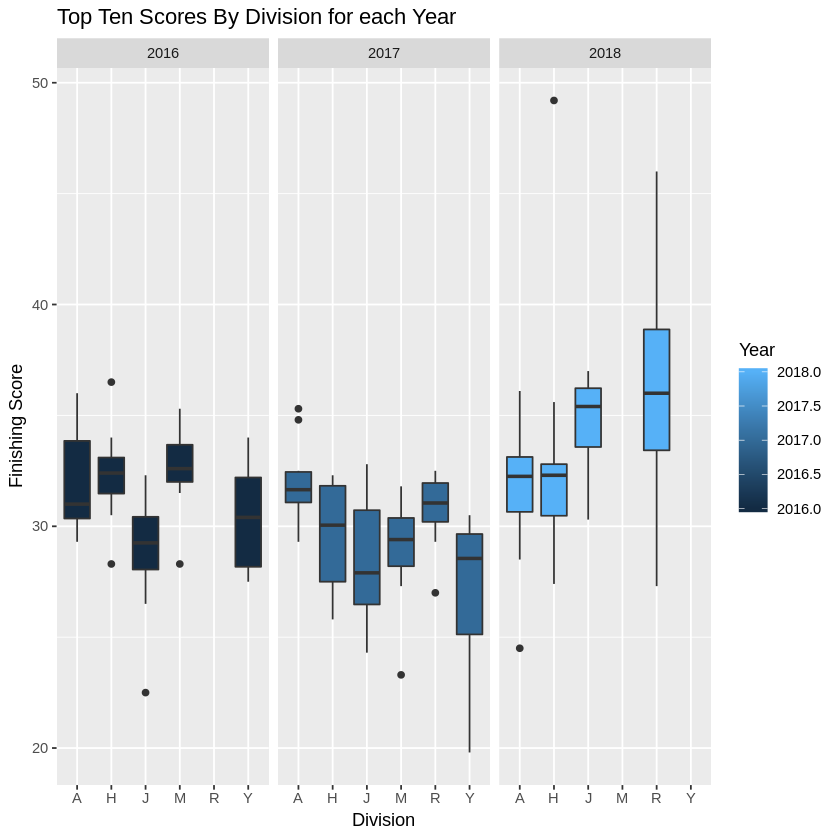

In [33]:
ggplot(topTenScores, aes(x=Division, y=Total.after.SJ, fill=Year)) + 
    geom_boxplot(aes(group=Division)) +
    facet_wrap(~Year)  +
    ggtitle("Top Ten Scores By Division for each Year") + 
    scale_x_discrete(name = "Division") + 
    scale_y_continuous(name = "Finishing Score")

Since we already examined the percentage of all competitors that finished on their dressage score, let's see what those numbers look like for top ten finishers.

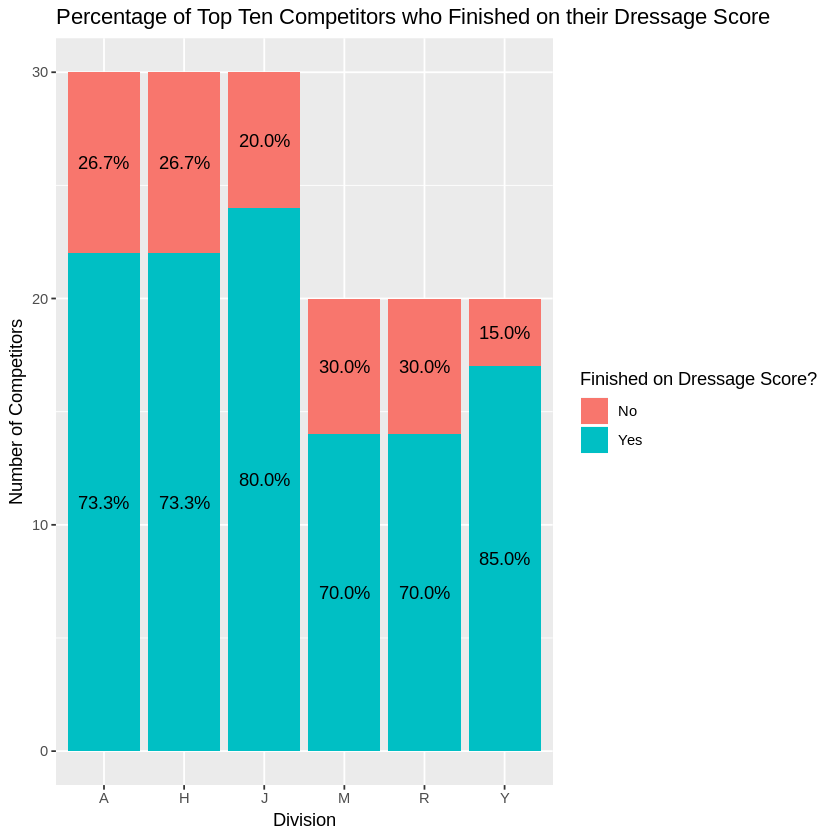

In [143]:
ggplot(topTenScores %>% count(Division, FinishedOnDrScore) %>% group_by(Division) %>%
         mutate(percent=n/sum(n)),
         aes(Division, n, fill=FinishedOnDrScore)) +
       geom_bar(stat="identity") +
       geom_text(aes(label=paste0(sprintf("%1.1f", percent*100),"%")), 
            position=position_stack(vjust=0.5)) +
        scale_x_discrete("Division") + 
        scale_y_continuous(numberOfCompetitorsLabel) + 
        ggtitle("Percentage of Top Ten Competitors who Finished on their Dressage Score") + 
        scale_fill_discrete(name="Finished on Dressage Score?",
                           label=c("No", "Yes"))


Here we can see that every single division has a percentage higher than 70% of competitors who finished on their dressage score, which is more than 20% more than the whole group.

Below, we can see that in top ten finishers, every single competitor in the top ten ran without cross country jump penalties, although 9 competitors had time penalties.  This seems to suggest that it's vital not to accumulate any cross country penalties to place well.

In [144]:
totalXCPenaltiesTopTen <- topTenScores$XC.Jump + topTenScores$XC.Time
describe(totalXCPenaltiesTopTen)

totalXCPenaltiesTopTen 
       n  missing distinct     Info     Mean      Gmd 
     150        0        6    0.169   0.1333     0.26 
                                              
Value        0.0   0.4   1.2   2.0   3.2   8.4
Frequency    141     2     3     2     1     1
Proportion 0.940 0.013 0.020 0.013 0.007 0.007

## Conclusion

Exploratory data analysis has uncovered some interesting questions about the data set, such as:
* Is there a statistically significant different in final scores between divisions?
* Which division has the highest proportions of eliminations?
* Is there a difference in scores for different years?

All of these questions are answered in the [machine learning notebook](SchoegglJacquieMSDS692MachineLearning.ipynb).